# SyPy Bowl Analysis

In [60]:
# Load tools needed for project 1
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import panel as pn
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from bokeh.resources import INLINE
import matplotlib.pyplot as plt

In [61]:
pn.extension('plotly')

In [62]:
import hvplot.pandas

In [63]:
#imort image
from PIL import Image
im = Image.open("trophy.jfif")
#re-size image and save new file to fit needs
size = (640,960)
out = im.resize(size)
out.save('resized-trophy.jfif')
im_resized = Image.open('resized-trophy.jfif')

In [64]:
load_dotenv()
mapbox = os.getenv("mapbox_api_key")
px.set_mapbox_access_token(mapbox)

## Data Gathering and Preperation

In [65]:
#Create empty data fram and import data from www.pro-football-reference

nfl_data = pd.DataFrame([])
years_start = 1990
years_end = 2022
for year in range(years_start,years_end):
        url = f'https://www.pro-football-reference.com/years/{year}/preseason_odds.htm'
        df = pd.read_html(url)[0]
        df['year'] = year
        nfl_data = nfl_data.append(df, ignore_index=True, sort=False)
        
nfl_data.columns = ['Team', 'Super Bowl Odds', 'W/l Over-Under', 'Record', 'Year']

nfl_data

,Team,Super Bowl Odds,W/l Over-Under,Record,Year
0,Atlanta Falcons,15000,5.5,5-11 (under),1990
1,Buffalo Bills,1200,9.5,13-3 (over),1990
2,Chicago Bears,2000,8.5,11-5 (over),1990
3,Cincinnati Bengals,1500,9.5,9-7 (under),1990
4,Cleveland Browns,1200,9.0,3-13 (under),1990
...,...,...,...,...,...
988,San Francisco 49ers,1400,10.5,10-7,2021
989,Seattle Seahawks,2500,9.5,7-10,2021
990,Tampa Bay Buccaneers,700,12.0,13-4,2021
991,Tennessee Titans,2000,9.5,12-5,2021


In [66]:
#read in Super Bowl winners csv
superbowl = pd.read_csv(
    "superbowl_data.csv")
superbowl['Season Year'] = superbowl['Year'] - 1
#superbowl.iloc[:,0] = superbowl.iloc[:,0].shift(1)
superbowl

,Date,Year,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State,Season Year
0,Feb 7,2021,LV (55),Tampa Bay Buccaneers,31,Kansas City Chiefs,9,Tom Brady,Raymond James Stadium,Tampa,Florida,2020
1,Feb 2,2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida,2019
2,Feb 3,2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia,2018
3,Feb 4,2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota,2017
4,Feb 5,2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas,2016
5,Feb 7,2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California,2015
6,Feb 1,2015,XLIX (49),New England Patriots,28,Seattle Seahawks,24,Tom Brady,University of Phoenix Stadium,Glendale,Arizona,2014
7,Feb 2,2014,XLVIII (48),Seattle Seahawks,43,Denver Broncos,8,Malcolm Smith,MetLife Stadium,East Rutherford,New Jersey,2013
8,Feb 3,2013,XLVII (47),Baltimore Ravens,34,San Francisco 49ers,31,Joe Flacco,Mercedes-Benz Superdome,New Orleans,Louisiana,2012
9,Feb 5,2012,XLVI (46),New York Giants,21,New England Patriots,17,Eli Manning,Lucas Oil Stadium,Indianapolis,Indiana,2011


In [67]:
#set year as index in the odds data
nfl_data.sort_values(['Year','Super Bowl Odds'], ascending=True, inplace=True)
nfl_data.set_index('Year')

,Team,Super Bowl Odds,W/l Over-Under,Record
Year,,,,
1990,San Francisco 49ers,350,11.5,14-2 (over)
1990,Denver Broncos,700,9.5,5-11 (under)
1990,New York Giants,800,10.0,13-3 (over)
1990,Los Angeles Rams,900,10.5,5-11 (under)
1990,Minnesota Vikings,1000,10.0,6-10 (under)
...,...,...,...,...
2021,Jacksonville Jaguars,12500,6.5,3-14
2021,Cincinnati Bengals,15000,6.5,10-7
2021,New York Jets,15000,6.0,4-13


## Define Betting Strategies

In [93]:
# Strategy 1 - $100 on favorite
def top1(x):
    dftop1 = nfl_data[nfl_data['Year'] == x]
    return dftop1.head(1)
# Strategy 2 - $100 on Top 2
def top2(x):
    dftop2 = nfl_data[nfl_data['Year'] == x]
    return dftop2.head(2)

# Strategy 3 - $100 on Top 5def top5(x):
def top5(x):
    dftop5 = nfl_data[nfl_data['Year'] == x]
    return dftop5.head(5)

In [69]:
# Test functions
top1(1990)

,Team,Super Bowl Odds,W/l Over-Under,Record,Year
24,San Francisco 49ers,350,11.5,14-2 (over),1990


In [70]:
top2(1990)

,Team,Super Bowl Odds,W/l Over-Under,Record,Year
24,San Francisco 49ers,350,11.5,14-2 (over),1990
6,Denver Broncos,700,9.5,5-11 (under),1990


In [71]:
top5(1990)

,Team,Super Bowl Odds,W/l Over-Under,Record,Year
24,San Francisco 49ers,350,11.5,14-2 (over),1990
6,Denver Broncos,700,9.5,5-11 (under),1990
18,New York Giants,800,10.0,13-3 (over),1990
13,Los Angeles Rams,900,10.5,5-11 (under),1990
15,Minnesota Vikings,1000,10.0,6-10 (under),1990


In [72]:
#define function to compare Super Bowl winners to bet strategies
def xy(yr,strategy):
    superbowl_winners = superbowl[superbowl['Year'] == yr]
    if strategy == 1:
        if any(team==superbowl_winners['Winner'].item() for team in top1(yr)['Team']):
            return superbowl_winners['Winner'].item()
        else:
            return False
    elif strategy == 2:
        if any(team==superbowl_winners['Winner'].item() for team in top2(yr)['Team']):
            return superbowl_winners['Winner'].item()
        else:
            return False
    elif strategy == 3:
        if any(team==superbowl_winners['Winner'].item() for team in top5(yr)['Team']):
            return superbowl_winners['Winner'].item()
        else:
            return False

In [73]:
#define function to compare odds bet strategy
def odds(yr, strategy):
    if strategy == 1:
        superbowl_odds = top1(yr)[top1(yr)['Team'] == xy(yr,strategy)]
        return superbowl_odds['Super Bowl Odds'].item()
    elif strategy == 2:
        superbowl_odds = top2(yr)[top2(yr)['Team'] == xy(yr,strategy)]
        return superbowl_odds['Super Bowl Odds'].item()
    elif strategy == 3:
        superbowl_odds = top5(yr)[top5(yr)['Team'] == xy(yr,strategy)]
        return superbowl_odds['Super Bowl Odds'].item()


In [74]:
#define function to determine if winner is in stratgey and apply win/loss calculation
def main(yr,strategy):
    while xy(yr,strategy) != False:
        if strategy == 1:
            return ((odds(yr,strategy))*1) +100
        elif strategy == 2:
            return ((odds(yr,strategy))*.5) +50
        elif strategy == 3:
            return ((odds(yr,strategy))*.2) +20
    else:
        return -100 

In [75]:
strategies = [3,2,1]
df_combined = superbowl
for strategy in strategies:
    output = []
    for yr in range(years_start,years_end):
        output.append(main(yr,strategy))
    output.reverse()
    df = pd.DataFrame(output)
    df.columns = [f"strat{strategy}"]
    df_combined = pd.concat([df, df_combined], axis=1)
    df_combined = df_combined.dropna()
df_combined.loc[:,'hold'] = '100'


In [76]:
strategies = [3,2,1]
df_combined = superbowl
for strategy in strategies:
    output = []
    for yr in range(years_start,years_end):
        output.append(main(yr,strategy))
    output.reverse()
    df = pd.DataFrame(output)
    df.columns = [f"strat{strategy}"]
    df_combined = pd.concat([df, df_combined], axis=1)
    df_combined = df_combined.dropna()


In [77]:
#combine results of strategy functions
df_strats = df_combined[['Year','strat1','strat2','strat3']]
df_strats = df_strats.dropna()

df_strats 

,Year,strat1,strat2,strat3
0,2021,-100,400.0,160.0
1,2020,550,275.0,110.0
2,2019,500,250.0,100.0
3,2018,-100,-100.0,-100.0
4,2017,375,187.5,75.0
5,2016,-100,-100.0,-100.0
6,2015,-100,-100.0,180.0
7,2014,550,275.0,110.0
8,2013,-100,-100.0,-100.0
9,2012,-100,-100.0,-100.0


In [78]:
#set index on conbined results
df_strats.set_index('Year', inplace=True)

In [79]:
#sort results by ascending date order and run cumulative sum calculation
df_strats
df_strats.sort_values(by='Year', ascending=True, inplace=True)
df_strats.cumsum()

,strat1,strat2,strat3
Year,,,
1990,450,225.0,90.0
1991,350,475.0,190.0
1992,250,375.0,330.0
1993,700,600.0,420.0
1994,600,800.0,500.0
1995,900,950.0,560.0
1996,800,1300.0,700.0
1997,1150,1475.0,770.0
1998,1050,1375.0,910.0


## Chart and Analyize the Results

In [81]:
# Complete Strategies Line Graph
df_strats.cumsum().hvplot.line(
    x='Year', 
    y=('strat1', 'strat2', 'strat3'), 
    title="Strategy Performance", 
    xlabel="Years", 
    ylabel="Dollars"
)

:NdOverlay   [Variable]
   :Curve   [Year]   (value)

In [82]:
# Complete Strategies Box Plot
df_strats.cumsum().hvplot.box(
    y=('strat1', 'strat2', 'strat3'), 
    by='Year', 
    height=400, 
    width=400, 
    legend=False,
    title='Strategy Performance'
)

:BoxWhisker   [Variable]   (value)

In [83]:
#Correlation of Strategies
strats_corr = df_strats.corr()
strats_corr

,strat1,strat2,strat3
strat1,1.00000,0.410980,0.092560
strat2,0.41098,1.000000,0.388138
strat3,0.09256,0.388138,1.000000


<AxesSubplot:>

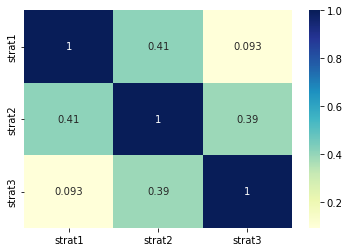

In [84]:
#Heatmap of Correlation Calculation
sns.heatmap(strats_corr, annot=True, cmap='YlGnBu')

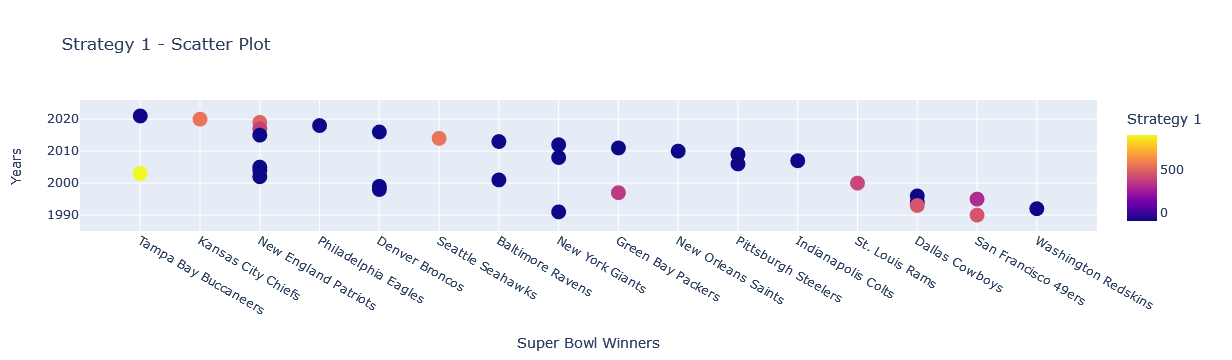

In [85]:
# Strategy 1 - Scatter Plot
strat1_scat = px.scatter(
    df_combined, 
    x='Winner', 
    y='Year', 
    color='strat1', 
    labels={'Year': "Years", 'Winner': "Super Bowl Winners", 'strat1': "Strategy 1"}, 
    title="Strategy 1 - Scatter Plot"
)
strat1_scat.update_traces(marker_size=15)
strat1_scat.show()

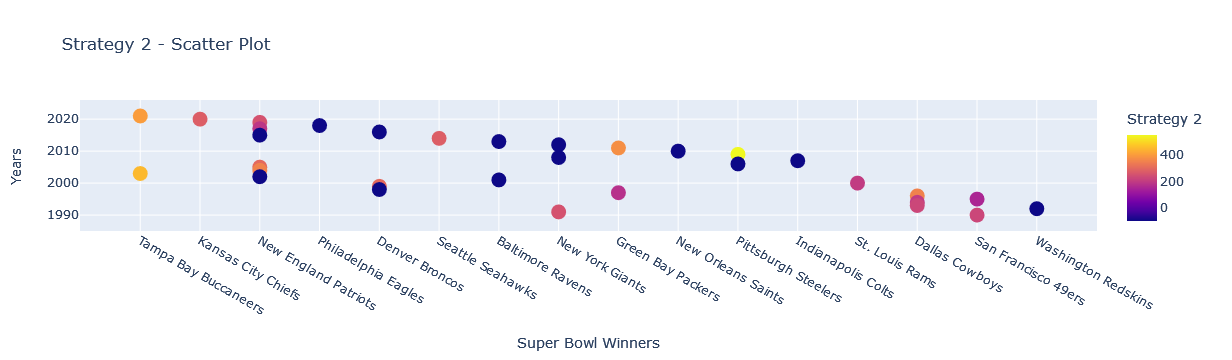

In [86]:
# Strategy 2 - Scatter Plot
strat2_scat = px.scatter(
    df_combined, 
    x='Winner', 
    y='Year', 
    color='strat2', 
    labels={'Year': "Years", 'Winner': "Super Bowl Winners", 'strat2': "Strategy 2"},
    title="Strategy 2 - Scatter Plot"
)
strat2_scat.update_traces(marker_size=15)
strat2_scat.show()

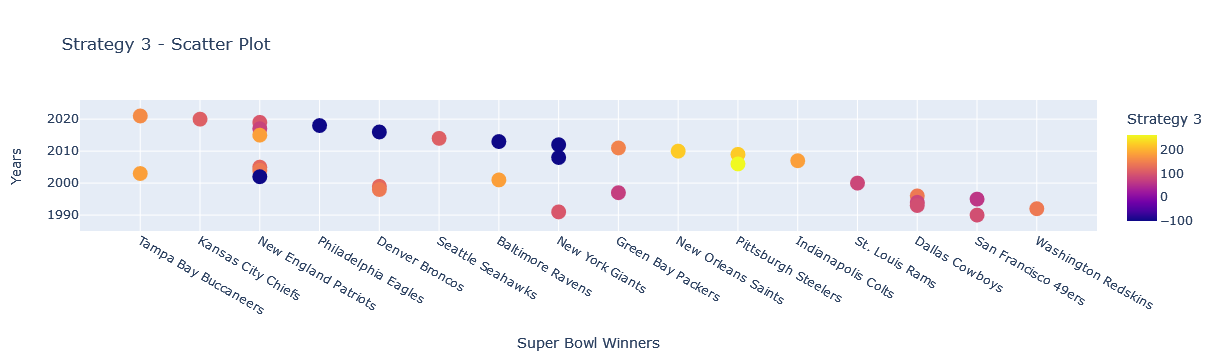

In [87]:
# Strategy 3 - Scatter Plot
strat3_scat = px.scatter(
    df_combined, 
    x='Winner', 
    y='Year', 
    color='strat3', 
    labels={'Year': "Years", 'Winner': "Super Bowl Winners", 'strat3': "Strategy 3"},
    title="Strategy 3 - Scatter Plot"
)
strat3_scat.update_traces(marker_size=15)
strat3_scat.show()

In [88]:
row = pn.Row(strat1_scat, strat2_scat, strat3_scat)
row

Row
    [0] Plotly(Figure)
    [1] Plotly(Figure)
    [2] Plotly(Figure)

In [89]:
column = pn.Column(
    '# Strategies - Scatter Plots',
    row)
column

Column
    [0] Markdown(str)
    [1] Row
        [0] Plotly(Figure, viewport={'xaxis.range': [-1.190435...})
        [1] Plotly(Figure, viewport={'xaxis.range': [-1.190435...})
        [2] Plotly(Figure, viewport={'xaxis.range': [-1.190435...})

In [90]:
# Panel of Strategy Scatter Plots
tabs = pn.Tabs(
    ("Strategy 1", strat1_scat),
    ("Strategy 2", strat2_scat),
    ("Strategy 3", strat3_scat))    
tabs

Tabs
    [0] Plotly(Figure, name='Strategy 1')
    [1] Plotly(Figure, name='Strategy 2')
    [2] Plotly(Figure, name='Strategy 3')

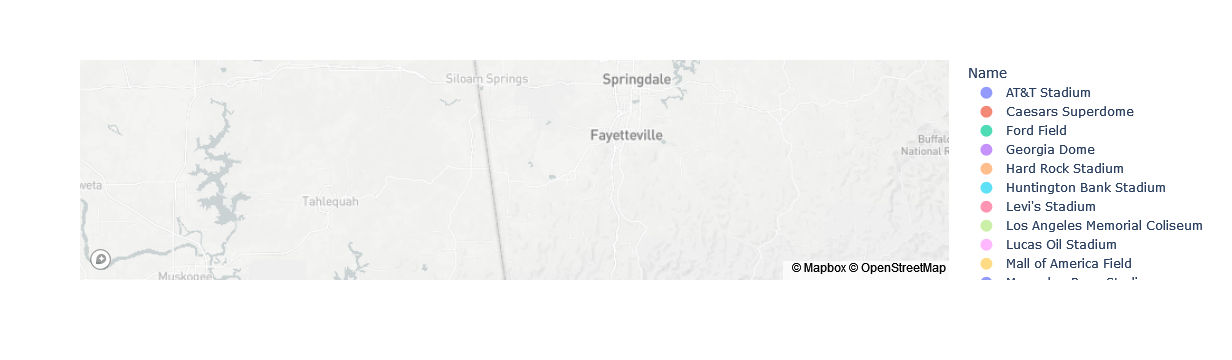

In [91]:

#import csv
sb_loc = pd.read_csv("superbowl_locations.csv")

#aggregate by name, geolat, geolong with count and convert series to dataframe

sb_loc_aggr = sb_loc.groupby( ['Name', 'GeoLat', 'GeoLong'] ).size().to_frame(name = 'count').reset_index()

# Plot Data
map_plot = px.scatter_mapbox(
    sb_loc_aggr,
    lat="GeoLat",
    lon="GeoLong",
    size="count",
    color="Name"
)

# Display the map
map_plot.show()

# _"If you're not IN the parade, you WATCH the parade. That's life."_ - Mike Ditka

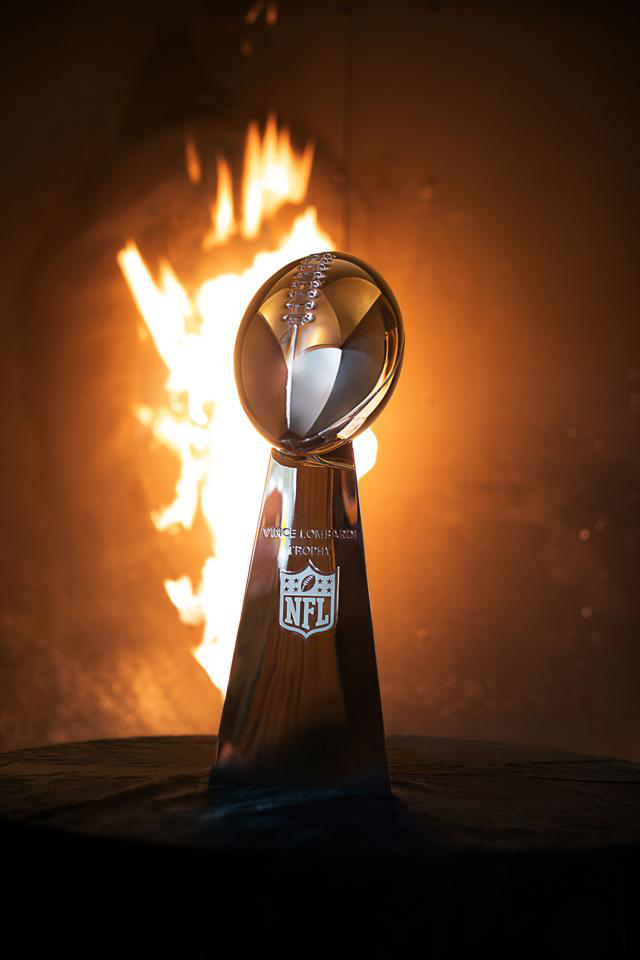

In [92]:
display(im_resized)